# Tutorial 1

Notebook from [HelloJulia.jl](https://github.com/ablaom/HelloJulia.jl)

Crash course in Julia basics:

Arithmetic, arrays, tuples, strings, dictionaries, functions,
iteration, random numbers, package loading, plotting

(40 min)

## Setup

The following block of code installs some third-party Julia packges. Beginners do not need
to understand it.

In [1]:
using Pkg
Pkg.activate(joinpath(@__DIR__, "..", ".."))
Pkg.instantiate()

  Activating project at `~/GoogleDrive/Julia/HelloJulia`


## Julia is a calculator:

In [2]:
1 + 2^3

9

In [3]:
sqrt(1 + 2^3) # do `sqrt(ans)` in REPL

3.0

In [4]:
sin(pi)

0.0

Query a function's document:

In [5]:
@doc sin

```
sin(x)
```

Compute sine of `x`, where `x` is in radians.

See also [`sind`](@ref), [`sinpi`](@ref), [`sincos`](@ref), [`cis`](@ref), [`asin`](@ref).

# Examples

```jldoctest
julia> round.(sin.(range(0, 2pi, length=9)'), digits=3)
1×9 Matrix{Float64}:
 0.0  0.707  1.0  0.707  0.0  -0.707  -1.0  -0.707  -0.0

julia> sind(45)
0.7071067811865476

julia> sinpi(1/4)
0.7071067811865475

julia> round.(sincos(pi/6), digits=3)
(0.5, 0.866)

julia> round(cis(pi/6), digits=3)
0.866 + 0.5im

julia> round(exp(im*pi/6), digits=3)
0.866 + 0.5im
```

```
sin(A::AbstractMatrix)
```

Compute the matrix sine of a square matrix `A`.

If `A` is symmetric or Hermitian, its eigendecomposition ([`eigen`](@ref)) is used to compute the sine. Otherwise, the sine is determined by calling [`exp`](@ref).

# Examples

```jldoctest
julia> sin(fill(1.0, (2,2)))
2×2 Matrix{Float64}:
 0.454649  0.454649
 0.454649  0.454649
```

```
sin(::BareInterval)
sin(::Interval)
```

Implement the `sin` function of the IEEE Standard 1788-2015 (Table 9.1).


At the REPL, you can instead do `?sin`. And you can search for all
doc-strings referring to "sine" with `apropos("sine")`.

## Arrays

One dimensional vectors:

In [6]:
v = [3, 5, 7]

3-element Vector{Int64}:
 3
 5
 7

In [7]:
length(v)

3

A "row vector" is a 1 x n array:

In [8]:
row = [3 5 7]

1×3 Matrix{Int64}:
 3  5  7

Multiple row vectors separated by semicolons or new lines define matrices:

In [9]:
A = [3 5 7
     2 4 6
     1 3 5]

3×3 Matrix{Int64}:
 3  5  7
 2  4  6
 1  3  5

In [10]:
size(A)

(3, 3)

In [11]:
length(A)

9

Accessing elements (Julia indices start at 1 not 0):

In [12]:
A[1, 2]

5

Get the second column:

In [13]:
A[:, 2] # 2nd column

3-element Vector{Int64}:
 5
 4
 3

Changing elements:

In [14]:
A[1, 1] = 42

42

Matrices can also be indexed as if columns where concatenated into a
single vector (which is how they are stored internally):

In [15]:
A[2, 3] == A[8]

true

In [16]:
inv(A) # inverse

3×3 Matrix{Float64}:
  0.025641   -0.0512821   0.025641
 -0.0512821   2.60256    -3.05128
  0.025641   -1.55128     2.02564

In [17]:
isapprox(inv(A)*v, A\v) # but RHS more efficient

true

## "Variables" in Julia *point* to objects

Corollary: all passing of function arguments is pass by reference.

Like Python; Unlike R, C or FORTRAN.

In [18]:
u = [3, 5, 7]

w = u

3-element Vector{Int64}:
 3
 5
 7

In [19]:
w

3-element Vector{Int64}:
 3
 5
 7

In [20]:
u[1] = 42

42

In [21]:
u

3-element Vector{Int64}:
 42
  5
  7

In [22]:
w

3-element Vector{Int64}:
 42
  5
  7

## Tuples

Similar to vectors but of fixed length and immutable (cannot be changed)

In [23]:
t1 = (1, 2.0, "cat")
typeof(t1)

Tuple{Int64, Float64, String}

In [24]:
t1[3]

"cat"

Tuples also come in a *named* variety:

In [25]:
t2 = (i = 1, x = 2.0, animal="cat")

(i = 1, x = 2.0, animal = "cat")

In [26]:
t2.x

2.0

## Strings and relatives

In [27]:
a_string = "the cat"
a_character = 't'
a_symbol = :t

:t

In [28]:
a_string[1] == a_character

true

A `Symbol` is string-like but
[interned](https://en.wikipedia.org/wiki/String_interning). Generally use `String` for
ordinary textual data, but use `Symbol` for language reflection (metaprogramming) - for
example when referring to the *name* of a variable, as opposed to its value:

In [29]:
names = keys(t2)

(:i, :x, :animal)

In [30]:
:x in names

true

In [31]:
isdefined(@__MODULE__, :z)

false

In [32]:
z = 1 + 2im

1 + 2im

In [33]:
isdefined(@__MODULE__, :z)

true

Symbols are generalized by *expressions*:

In [34]:
ex = :(z == 3)

:(z == 3)

In [35]:
eval(ex)

false

If this is confusing, forget it for now.

## Dictionaries

In [36]:
d = Dict('a' => "ant", 'z' => "zebra")

Dict{Char, String} with 2 entries:
  'a' => "ant"
  'z' => "zebra"

In [37]:
d['a']

"ant"

In [38]:
d['b'] = "bat"
d

Dict{Char, String} with 3 entries:
  'a' => "ant"
  'z' => "zebra"
  'b' => "bat"

In [39]:
keys(d)

KeySet for a Dict{Char, String} with 3 entries. Keys:
  'a'
  'z'
  'b'

The expression 'a' => "ant" is itself a stand-alone object called a *pair*:

In [40]:
pair = 'a' => "ant"
first(pair)

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

## Functions

Three ways to define a generic function:

In [41]:
foo(x) = x^2 # METHOD 1 (inline)
foo(3)

9

or

In [42]:
3 |> foo

9

or

In [43]:
3 |> x -> x^2 # METHOD 2 (anonymous)

9

or

In [44]:
function foo2(x) # METHOD 3 (verbose)
    y = x
    z = y
    w = z
    return w^2
end

foo2(3)

9

## Basic iteration

Here are four ways to square the integers from 1 to 10.

METHOD 1 (explicit loop):

In [45]:
squares = [] # or Int[] if performance matters
for x in 1:10
    push!(squares, x^2)
end

squares

10-element Vector{Any}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 2 (comprehension):

In [46]:
[x^2 for x in 1:10]

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 3 (map):

In [47]:
map(x -> x^2, 1:10)

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

METHOD 4 (broadcasting with dot syntax):

In [48]:
(1:10) .^ 2

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

## Random numbers

In [49]:
typeof(2)

Int64

In [50]:
rand() # sample a Float64 uniformly from interval [0, 1]

0.5373161485486371

In [51]:
rand(3, 4) # do that 12 times and put in a 3 x 4 array

3×4 Matrix{Float64}:
 0.156884  0.965893  0.822031  0.175844
 0.263368  0.389618  0.341254  0.288944
 0.545627  0.789382  0.801309  0.207644

In [52]:
randn(3, 4) # use normal distribution instead

3×4 Matrix{Float64}:
 0.779817   -0.519889   0.534122   -1.55778
 0.0072398   1.49424   -0.0276442  -2.16914
 1.15712     1.28477   -0.260504    0.594076

In [53]:
rand(Int8) # random elment of type Int8

-80

In [54]:
rand(['a', 'b', 'c'], 10) # 10 random elements from a vector

10-element Vector{Char}:
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)
 'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)
 'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

Some standard libraries are needed to do more, for example:

In [55]:
using Random

In [56]:
randstring(30)

"ttub5SwnG2VXA0UMwjkc0XRvMxHKn5"

In [57]:
using Statistics

In [58]:
y = rand(30)
mean(y)

0.39534950422987486

In [59]:
quantile(y, 0.75)

0.6192953665657467

## Probability distributions

For sampling from more general distributions we need
Distributions.jl package which is not part of the standard library.

In [60]:
using Distributions

N = 1000
samples = rand(Normal(), N);   # equivalent to Julia's built-in `randn(d)`
samples = (samples).^2;        # square element-wise

In [61]:
g = fit(Gamma, samples)

Distributions.Gamma{Float64}(α=0.5148824829610816, θ=2.0240393033364423)

In [62]:
mean(g)

1.0421423821126854

In [63]:
median(g)

0.4863847498413582

In [64]:
pdf(g, 1)

0.2464039067819249

In [65]:
using PkgOnlineHelp

Uncomment and execute the next line to launch Distribution documentation in your browser:

In [66]:
#@docs Distributions

## Plotting

In [67]:
using CairoMakie
CairoMakie.activate!(type = "png")

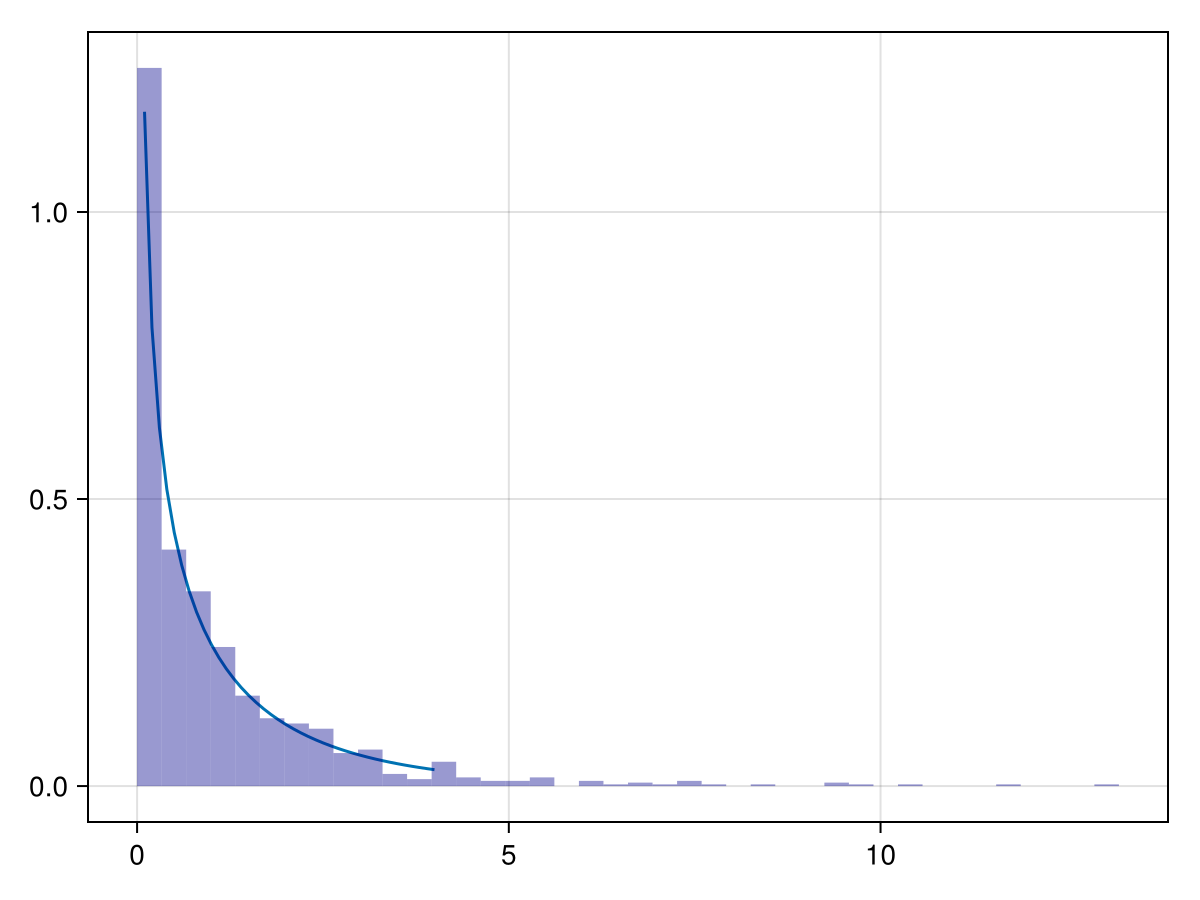

In [68]:
f(x) = pdf(g, x)

xs = 0:0.1:4 # floats from 0 to 4 in steps of 0.1
ys = f.(xs)  # apply f element-wise to xs

fig = lines(xs, ys)
hist!(samples, normalization=:pdf, bins=40, color=(:darkblue, 0.4))
current_figure()

In [69]:
save("my_first_plot.png", fig)

CairoMakie.Screen{IMAGE}


# Exercises

## Exercise 1

Write a function named `total` that adds the elements of its vector input.

## Exercise 2

Generate a 1000 random samples from the standard normal
distribution. Create a second such sample, and add the two samples
point-wise.  Compute the (sample) mean and variance of the combined
samples. In the same
plot, show a frequency-normalized histogram of the combined samples
and a plot of the pdf for normal distribution with zero mean and
variance `2`.

You can use `std` to compute the standard deviation and `sqrt` to
compute square roots.

## Exercise 3

The following shows that named tuples share some behaviour with dictionaries:

In [70]:
t = (x = 1, y = "cat", z = 4.5)
keys(t)

(:x, :y, :z)

In [71]:
t[:y]

"cat"

Write a function called `dict` that converts a named tuple to an
actual dictionary. You can create an empty dictionary using `Dict()`.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*